In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets


np.random.seed(1)

(200, 2)
(200,)
(2, 200)
(1, 200)


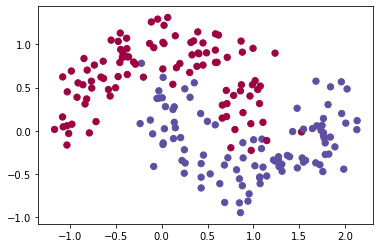

In [108]:
X, Y = load_planar_dataset()
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###



X, Y = datasets[dataset]

print(X.shape)
print(Y.shape)
X, Y = X.T, Y.reshape(1, Y.shape[0])

print(X.shape)
print(Y.shape)

#X, Y = load_planar_dataset()
#print(Y.shape)

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

In [109]:
shape_X = X.shape
shape_Y = Y.shape
m= Y.size

print('The shape of X is : ' + str(shape_X))
print('The shape of Y is :' + str(shape_Y))
print('I have m = %d training examples!' %(m))

The shape of X is : (2, 200)
The shape of Y is :(1, 200)
I have m = 200 training examples!


## Logistic regression

In [43]:
#train LR classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic regression : 87%(percentage of correctly labeled datapoints)


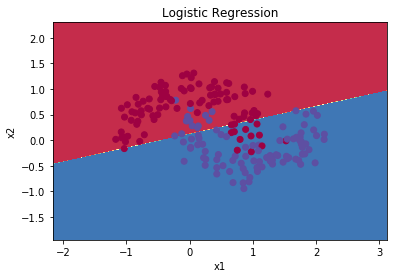

In [44]:
#plot decision boundary for LR
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

#print accuracy
LR_predictions = clf.predict(X.T)
print('Accuracy of logistic regression : %d' %float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1 - LR_predictions))/float(Y.size)*100) + '%' + "(percentage of correctly labeled datapoints)")

## Neural Network model

In [110]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return(n_x, n_h, n_y)

In [111]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape = (n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape = (n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [113]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #forward propogation
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1" : Z1,
            "A1" : A1,
            "Z2" : Z2,
            "A2" : A2}
    
    return A2, cache

In [115]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example
    
    #cross entropy
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    cost = - 1 /m * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # # makes sure cost is the dimension we expect. 
                                     # E.g., turns [[17]] into 17 
        
    return cost
    

In [117]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    #backpropagation
    dZ2 = A2 -Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1 - np.power(A1, 2)))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1" :dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [119]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [121]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_size(X, Y)[0]
    n_y = layer_size(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #Loop gradient descent
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
        
        #Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
                    
        #Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
                       
        if print_cost and i % 1000 == 0:
                       print("Cost after iteration %i: %f" %(i, cost))
                       
    return parameters

In [123]:
def predict(parameters, X):
    
    # Computes probabilities using forward propagation, 
    #and classifies to 0/1 using 0.5 as the threshold.
    
    A2 ,cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

Cost after iteration 0: 0.692996
Cost after iteration 1000: 0.312726
Cost after iteration 2000: 0.111779
Cost after iteration 3000: 0.102663
Cost after iteration 4000: 0.098325
Cost after iteration 5000: 0.094951
Cost after iteration 6000: 0.092441
Cost after iteration 7000: 0.090517
Cost after iteration 8000: 0.088960
Cost after iteration 9000: 0.087659


Text(0.5, 1.0, 'Decision Boundary for hidden layer size4')

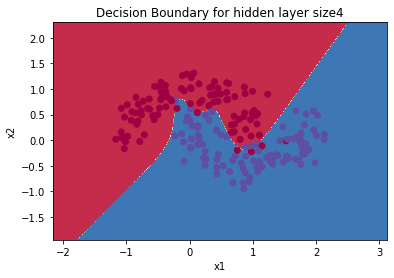

In [126]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h=4, num_iterations = 10000, print_cost=True)

#plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size" + str(4))

In [127]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 95%


In [128]:
dataset = "noisy_circles"
X, Y = datasets[dataset]

print(X.shape)
print(Y.shape)

(200, 2)
(200,)


In [129]:
X, Y = X.T, Y.reshape(1, Y.shape[0])
print(X.shape)
print(Y.shape)

(2, 200)
(1, 200)


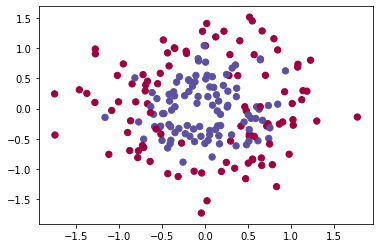

In [130]:
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

Cost after iteration 0: 0.693143
Cost after iteration 1000: 0.367208
Cost after iteration 2000: 0.375313
Cost after iteration 3000: 0.375303
Cost after iteration 4000: 0.375323
Cost after iteration 5000: 0.375351
Cost after iteration 6000: 0.375375
Cost after iteration 7000: 0.375394
Cost after iteration 8000: 0.375407
Cost after iteration 9000: 0.375416
Accuracy: 81%


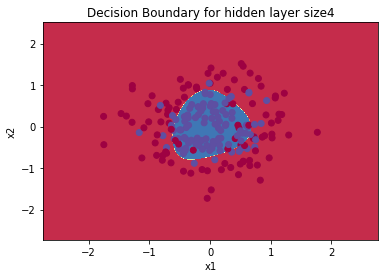

In [132]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h=4, num_iterations = 10000, print_cost=True)

#plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size" + str(4))

# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

In [134]:
dataset = "blobs"
X, Y = datasets[dataset]

print(X.shape)
print(Y.shape)

(200, 2)
(200,)


In [135]:
X, Y = X.T, Y.reshape(1, Y.shape[0])
Y = Y%2
print(X.shape)
print(Y.shape)

(2, 200)
(1, 200)


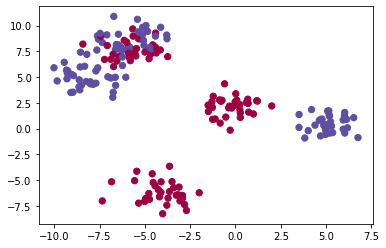

In [136]:
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

Cost after iteration 0: 0.693527
Cost after iteration 1000: 0.324388
Cost after iteration 2000: 0.323299
Cost after iteration 3000: 0.323036
Cost after iteration 4000: 0.322914
Cost after iteration 5000: 0.322844
Cost after iteration 6000: 0.322799
Cost after iteration 7000: 0.322766
Cost after iteration 8000: 0.322742
Cost after iteration 9000: 0.322724
Accuracy: 83%


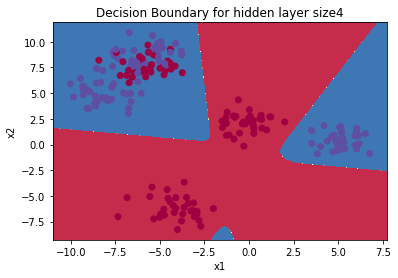

In [137]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h=4, num_iterations = 10000, print_cost=True)

#plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size" + str(4))

# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy for 1 hidden units: 67.0 %
Accuracy for 2 hidden units: 67.0 %
Accuracy for 3 hidden units: 83.0 %
Accuracy for 4 hidden units: 83.0 %
Accuracy for 5 hidden units: 83.0 %
Accuracy for 20 hidden units: 89.0 %
Accuracy for 50 hidden units: 83.5 %


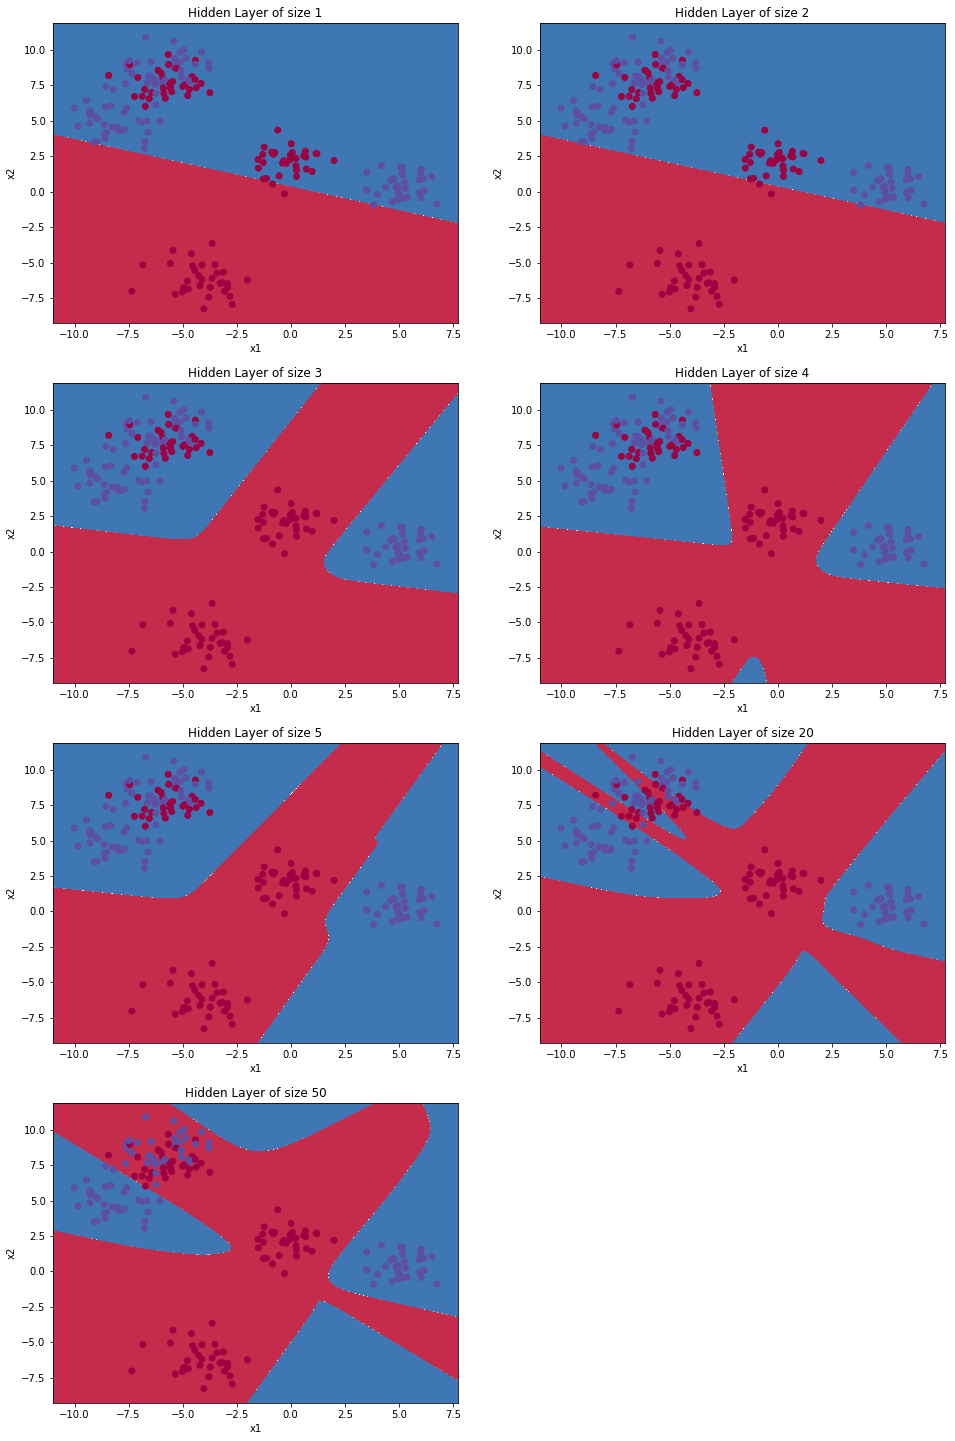

In [139]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [140]:
dataset = "gaussian_quantiles"
X, Y = datasets[dataset]

print(X.shape)
print(Y.shape)

(200, 2)
(200,)


In [141]:
X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])
print(X.shape)
print(Y.shape)

(2, 200)
(1, 200)


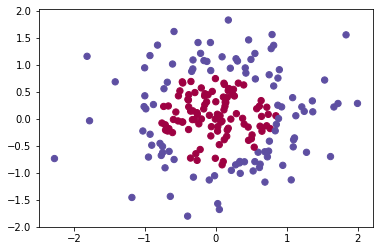

In [143]:
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

Cost after iteration 0: 0.693138
Cost after iteration 1000: 0.084823
Cost after iteration 2000: 0.051352
Cost after iteration 3000: 0.039184
Cost after iteration 4000: 0.032179
Cost after iteration 5000: 0.027593
Cost after iteration 6000: 0.024305
Cost after iteration 7000: 0.021810
Cost after iteration 8000: 0.019838
Cost after iteration 9000: 0.018232
Accuracy: 100%


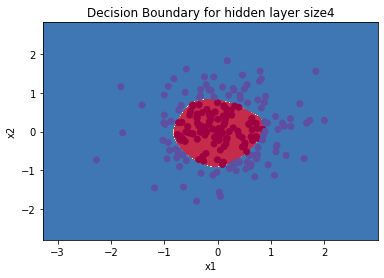

In [144]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h=4, num_iterations = 10000, print_cost=True)

#plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size" + str(4))

# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 81.0 %
Accuracy for 3 hidden units: 95.5 %
Accuracy for 4 hidden units: 100.0 %
Accuracy for 5 hidden units: 95.5 %
Accuracy for 20 hidden units: 100.0 %
Accuracy for 50 hidden units: 100.0 %


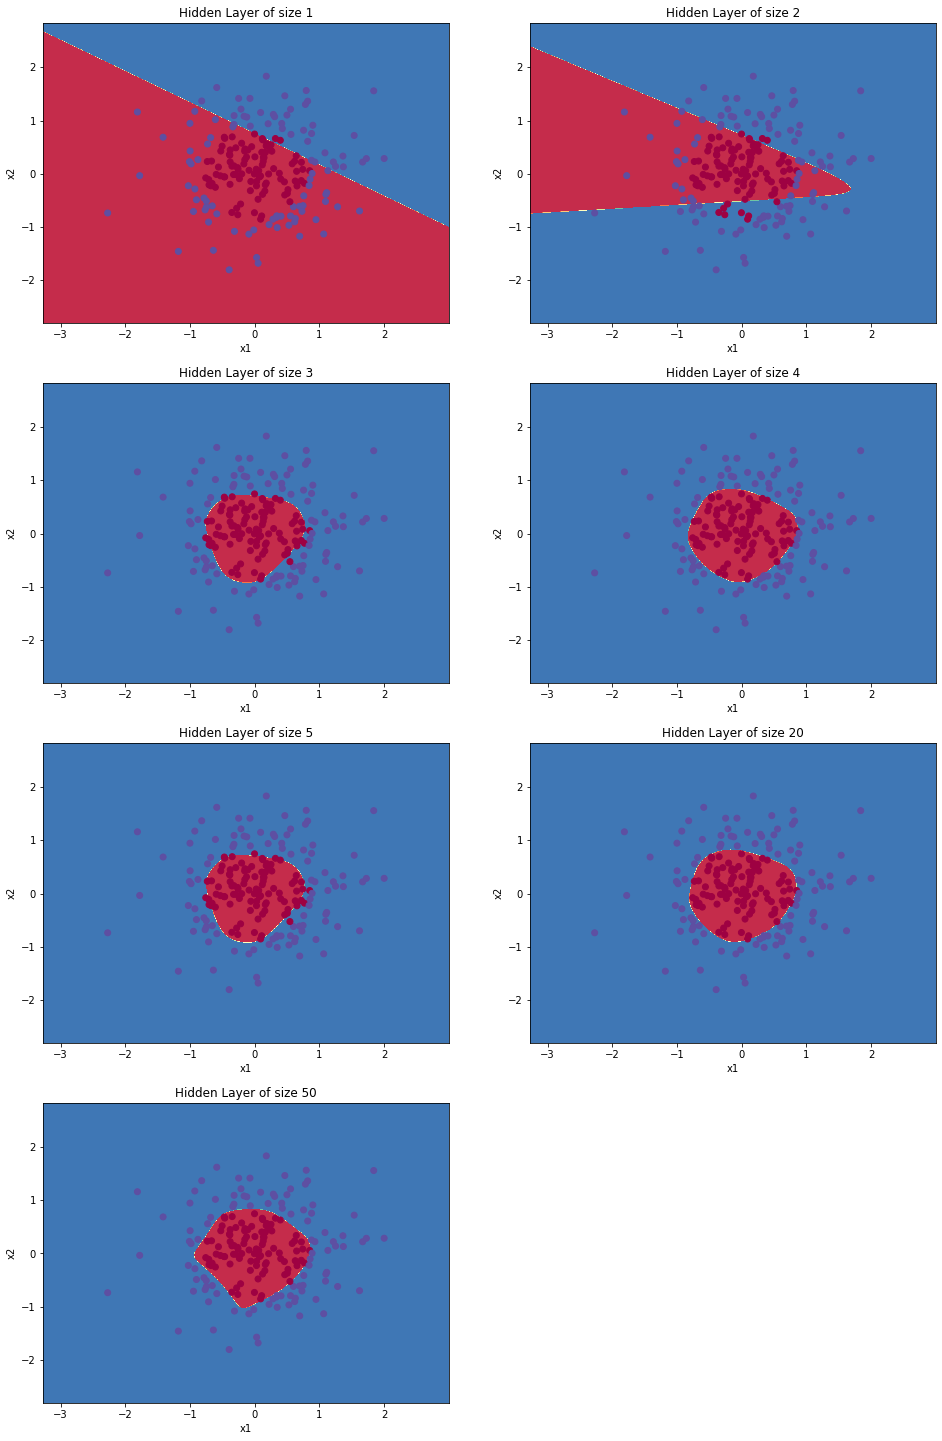

In [145]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))